In [1]:
import pandas as pd
import numpy as np
import re, time
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [3]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.preprocessing import StandardScaler

# Data exploration

In [4]:
data=pd.read_csv('./all_accelerometer_data_pids_13.csv')

In [6]:
data.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [7]:
data.pid.unique()

array(['JB3156', 'CC6740', 'SA0297', 'PC6771', 'BK7610', 'DC6359',
       'MC7070', 'MJ8002', 'BU4707', 'JR8022', 'HV0618', 'SF3079',
       'DK3500'], dtype=object)

In [11]:
data.loc[data.pid=='JB3156'].query('time==1493739732016')

,time,pid,x,y,z
541149,1493739732016,JB3156,-2.556815,8.312009,14.090558


In [26]:
data.time.max()

1493829248294

In [41]:
df=pd.DataFrame()
folder='./clean_tac/'
for file in os.listdir('./clean_tac/'):
    name=file.split('_clean_TAC.csv')[0]
    df_=pd.read_csv(folder+file)
    df_['pid']=name
    df=pd.concat([df,df_])

# Timestamp diversion

Timestamp= number of seconds since 1-Jan-1970 00h00,00

In [62]:
time_stamp_0=df.timestamp.iloc[0]
time_stamp_0

1493727820

In [63]:
date_0=datetime.fromtimestamp(time_stamp_0)
date_0

datetime.datetime(2017, 5, 2, 14, 23, 40)

In [70]:
date_0.time()

datetime.time(14, 23, 40)

In [75]:
dt=date_0-datetime(1970,1,1,0,0,0)
dt

datetime.timedelta(17288, 51820)

In [76]:
time.gmtime(time_stamp_0)

time.struct_time(tm_year=2017, tm_mon=5, tm_mday=2, tm_hour=12, tm_min=23, tm_sec=40, tm_wday=1, tm_yday=122, tm_isdst=0)

In [79]:
dt.days*24*3600+dt.seconds-2*3600==time_stamp_0

True

# Plotting

In [80]:
df.timestamp=df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [89]:
df.pid.unique()

array(['DK3500', 'JR8022', 'SA0297', 'BU4707', 'HV0618', 'SF3079',
       'MJ8002', 'CC6740', 'PC6771', 'MC7070', 'DC6359', 'BK7610',
       'JB3156'], dtype=object)

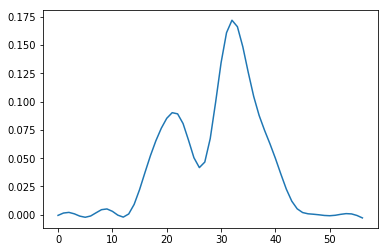

In [93]:
df[df.pid=='BU4707']['TAC_Reading'].plot()
plt.show()

In [94]:
df.groupby('pid')['TAC_Reading'].std()

pid
BK7610    0.050705
BU4707    0.050705
CC6740    0.077362
DC6359    0.048602
DK3500    0.033744
HV0618    0.050129
JB3156    0.031349
JR8022    0.061737
MC7070    0.069810
MJ8002    0.069967
PC6771    0.028980
SA0297    0.054026
SF3079    0.065088
Name: TAC_Reading, dtype: float64